In [1]:
import geopandas as gpd
import requests as req
import matplotlib.pyplot as plt

In [2]:
API_ROUTE = 'https://oaiee.scj.gov.co/agc/rest/services'

# _**LAYER: Delitos de Alto Impacto**_

In [3]:
DAI_layer_0 = f'{API_ROUTE}/Tematicos_Pub/CifrasSCJ/MapServer/0'
DAI_fields_route = f'{DAI_layer_0}/query?where=1=1&outFields=*&f=geojson'
DAI_metadata_route = f'{DAI_layer_0}?f=pjson'
DAI_metadata = req.get(DAI_metadata_route).json()

In [4]:
EPSG = DAI_metadata.get('sourceSpatialReference').get('latestWkid')
DAI = gpd.read_file(DAI_fields_route)
DAI = DAI.to_crs(epsg=EPSG)

# _**LAYER: Incidentes Reportados Sector Catastral**_

In [5]:
IR_Layer_7 = f'{API_ROUTE}/Tematicos_Pub/CifrasSCJ/MapServer/7'
IR_fields_route = f'{IR_Layer_7}/query?where=1%3D1&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson'
IR_metadata_route = f'{IR_Layer_7}?f=pjson'
IR_metadata = req.get(IR_metadata_route).json()

In [6]:
EPSG = IR_metadata.get('sourceSpatialReference').get('latestWkid')
IR = gpd.read_file(IR_fields_route)
IR = IR.to_crs(epsg=EPSG)

# _**LAYER: Cuadrante de Policía**_

In [7]:
CP_layer_25 = f'{API_ROUTE}/Tematicos_NR/EquipamientoPMSDSCJ/MapServer/25'
CP_fields_route = f'{CP_layer_25}/query?where=1=1&outFields=*&f=geojson'
CP_metadata_route = f'{CP_layer_25}?f=pjson'
CP_metadata = req.get(CP_metadata_route).json()

In [8]:
EPSG = CP_metadata.get('sourceSpatialReference').get('latestWkid')
CP = gpd.read_file(CP_fields_route)
CP = gpd.read_file(CP_fields_route)

# _**LAYER: Comando de Atención Inmediata**_

In [9]:
CAI_layer_22 = f'{API_ROUTE}/Tematicos_NR/EquipamientoPMSDSCJ/MapServer/22'
CAI_fields_route = f'{CAI_layer_22}/query?where=1=1&outFields=*&f=geojson'
CAI_metadata_route = f'{CAI_layer_22}?f=pjson'
CAI_metadata = req.get(CAI_metadata_route).json()

In [10]:
CAI = gpd.read_file(CAI_fields_route)

# ***MERGING: Plotting Layers***

# _Cuadrante de Policia + Comando de Atención Inmediata_

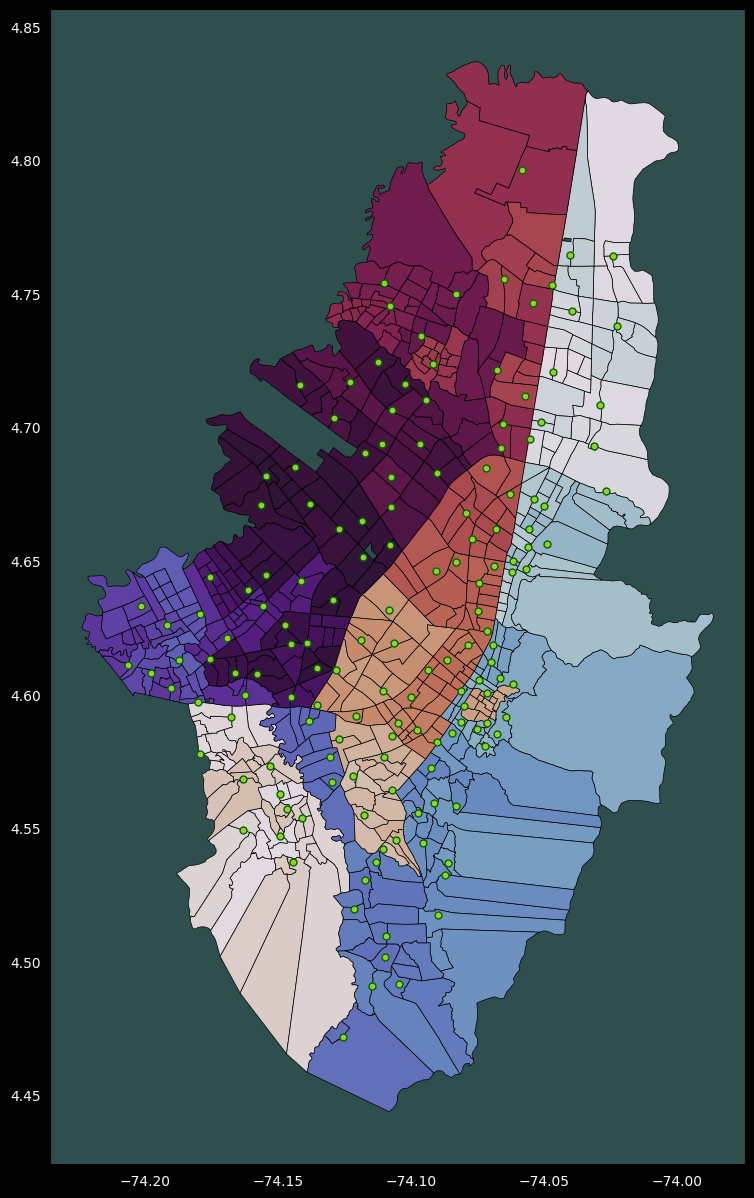

In [51]:
fig, ax = plt.subplots(figsize = (15, 15))
CP.plot(ax = ax, cmap='twilight', edgecolor='black', linewidth=0.5, column='PCUCODIGO')
#IR.plot(ax = ax, color='none', linewidth=1, edgecolor='black')
CAI.plot(ax = ax, color='yellowgreen', edgecolor='darkgreen', markersize=25)
fig.set_facecolor('black')
ax.set_facecolor(color='darkslategray')
ax.tick_params(labelcolor='snow')

'\nMAS LLAMADAS PERO MENOS HURTOS?\n'

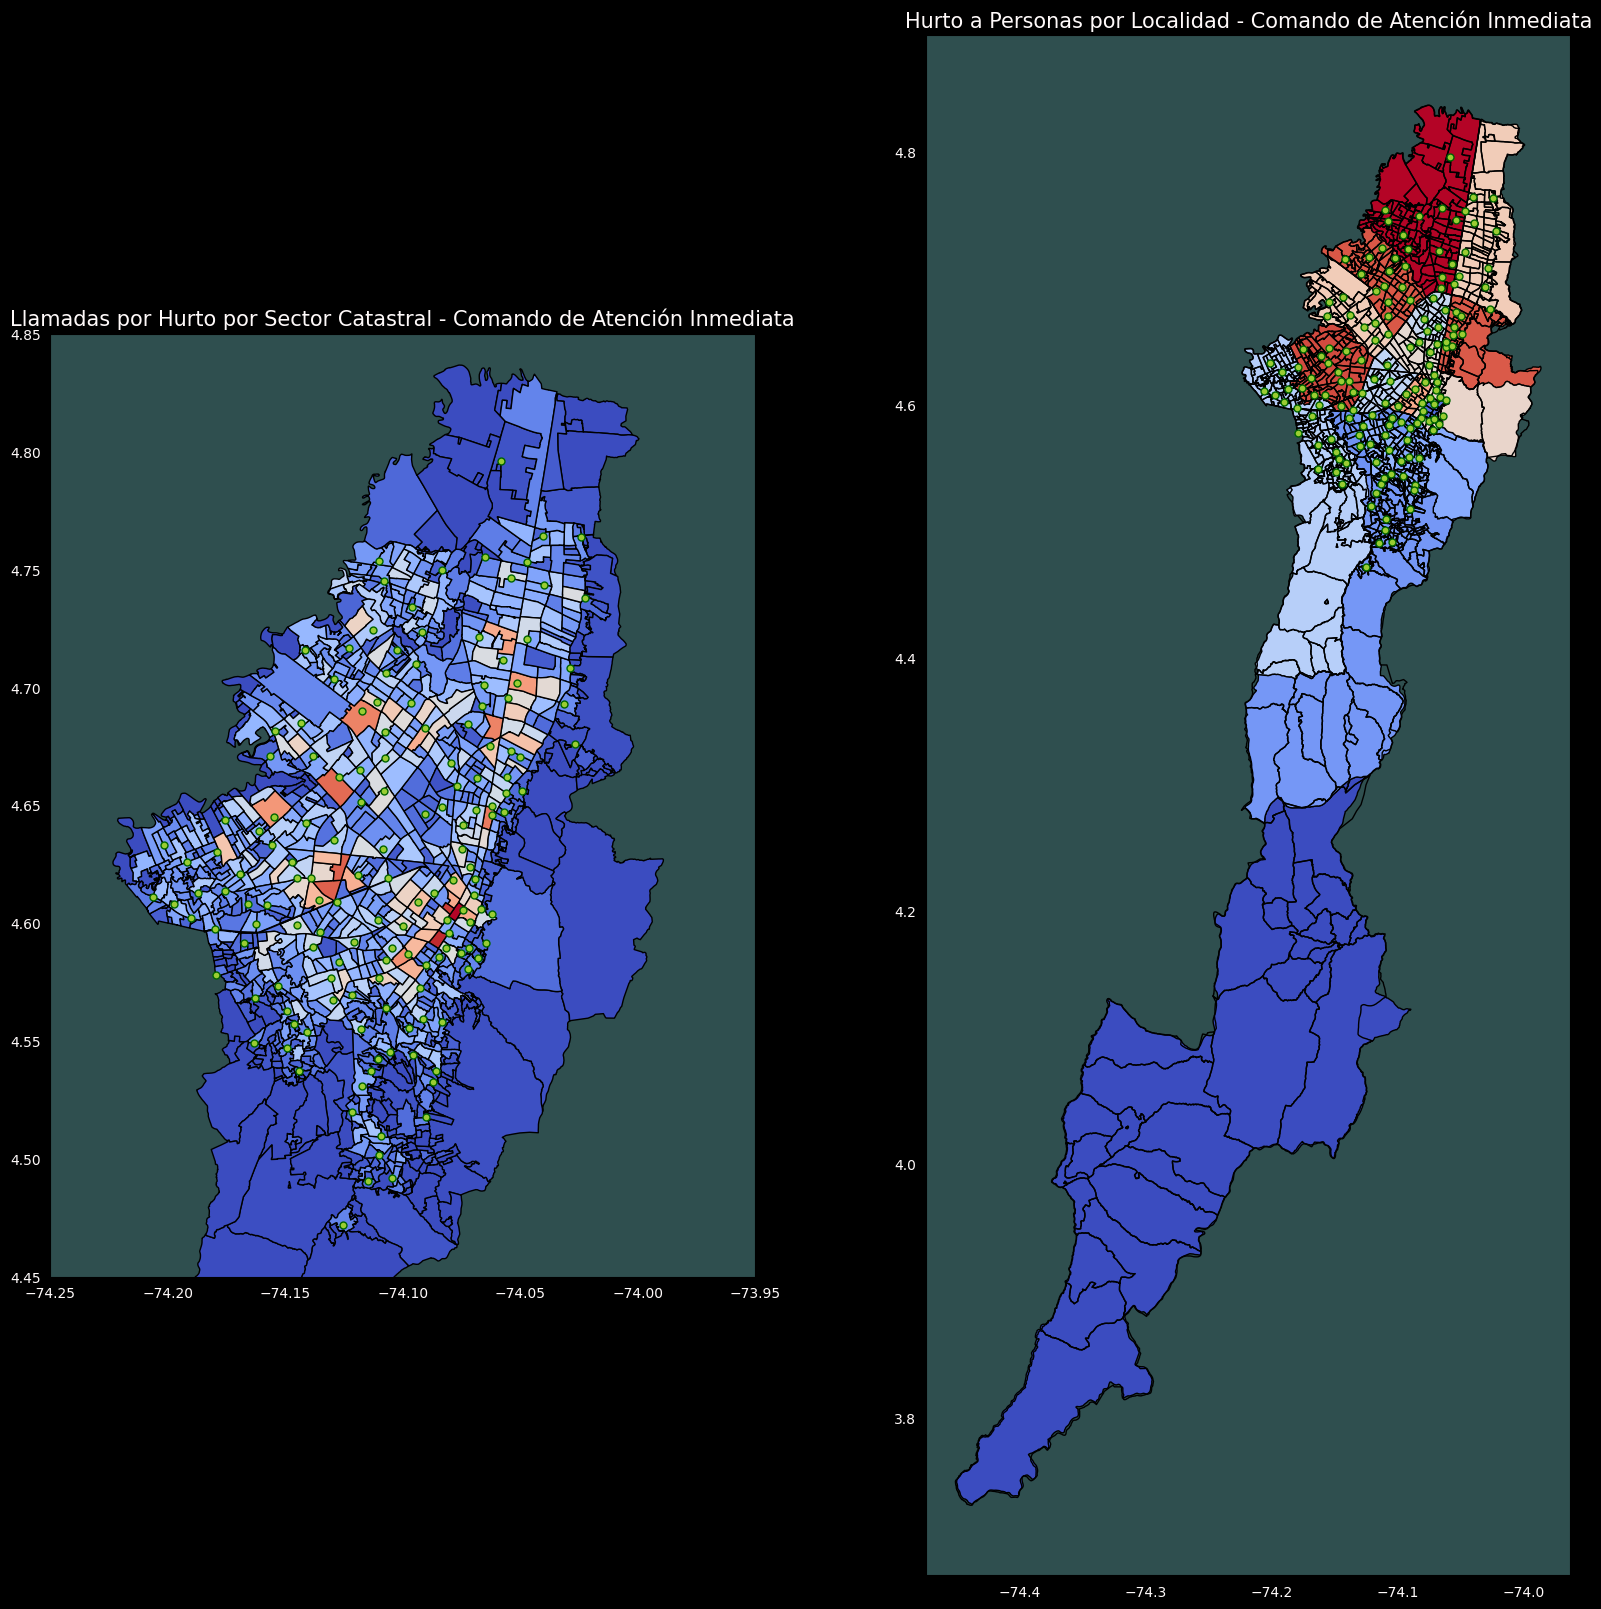

In [38]:
fig, axs = plt.subplots(ncols=2, figsize = (20, 20))
IR.plot(ax = axs[0], cmap='coolwarm', column='CMH24CONT', linewidth=1, edgecolor='black')
CAI.plot(ax = axs[0], color='yellowgreen', edgecolor='darkgreen', markersize=25)
fig.set_facecolor('black')
axs[0].set_facecolor(color='darkslategray')
axs[0].tick_params(labelcolor='snow')
axs[0].set_title('Llamadas por Hurto por Sector Catastral - Comando de Atención Inmediata', color='snow', size=15)
axs[0].set_ylim(4.45, 4.85)
axs[0].set_xlim(-74.25, -73.95)


DAI.plot(ax = axs[1], cmap='coolwarm', column='CMHP24CONT', linewidth=1, edgecolor='black')
IR.plot(ax = axs[1], color='none', linewidth=1, edgecolor='black')
CAI.plot(ax = axs[1], color='yellowgreen', edgecolor='darkgreen', markersize=25)
axs[1].set_facecolor(color='darkslategray')
axs[1].tick_params(labelcolor='snow')
axs[1].set_title('Hurto a Personas por Localidad - Comando de Atención Inmediata', color='snow', size=15)
#axs[1].set_ylim(4.45, 4.85)
#axs[1].set_ylim(-74.25)

"""
MAS LLAMADAS PERO MENOS HURTOS?
"""

# _Cuadrante de Policia + Delitos de Alto Impacto + Comando de Atención Inmediata_

In [42]:
#fig, ax = plt.subplots(figsize = (35, 35))
#DAI.plot(ax = ax, cmap='coolwarm', edgecolor='black', linewidth=1.5, column='CMHP24CONT')
#CP.plot(ax = ax, color='none', edgecolor='black', linewidth=0.5)
#CAI.plot(ax = ax, color='yellowgreen', edgecolor='seagreen', markersize=15)